In [ ]:
import os
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def stroop_summary(df):
    # Filter rows with actual trials
    trials = df[df['congruent'].notna()]
    trials = trials.copy()
    # Add readable type
    trials['trial_type'] = trials['congruent'].map({1.0: 'congruent', 0.0: 'incongruent'})
    # Group by trial type
    grouped = trials.groupby('trial_type')
    summary = {
        'participant': trials['participant'].iloc[0],
        'session': trials['session'].iloc[0],
        'n_trials_cong': grouped.size().get('congruent', 0),
        'n_trials_incong': grouped.size().get('incongruent', 0),
        'mean_rt_cong': grouped['resp.rt'].mean().get('congruent', None),
        'std_rt_cong': grouped['resp.rt'].std().get('congruent', None),
        'median_rt_cong': grouped['resp.rt'].median().get('congruent', None),
        'acc_cong': grouped['resp.corr'].mean().get('congruent', None) * 100 if 'congruent' in grouped.groups else None,
        'mean_rt_incong': grouped['resp.rt'].mean().get('incongruent', None),
        'std_rt_incong': grouped['resp.rt'].std().get('incongruent', None),
        'median_rt_incong': grouped['resp.rt'].median().get('incongruent', None),
        'acc_incong': grouped['resp.corr'].mean().get('incongruent', None) * 100 if 'incongruent' in grouped.groups else None,
    }
    return pd.DataFrame([summary])

In [ ]:
# Path to your folder containing CSV files
folder = r'C:\Users\adoni\Documents\CurrentStudy\data\stroop_resps'
# Find all .csv files in the folder
csv_files = glob(os.path.join(folder, '*.csv'))

# Process each file and collect the summaries
all_summaries = []
for csv_file in csv_files:
    try:
        df = pd.read_csv(csv_file)
        summary = stroop_summary(df)
        summary['file'] = os.path.basename(csv_file)  # Optionally track source file
        all_summaries.append(summary)
    except Exception as e:
        print(f"Error processing {csv_file}: {e}")

# Concatenate all summaries into a single DataFrame
summary_df = pd.concat(all_summaries, ignore_index=True)

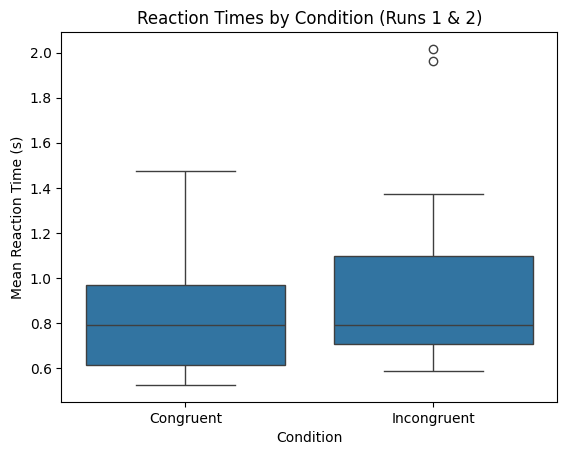

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtra solo run 1 y run 2
df_runs_1_2 = summary_df[summary_df['session'].isin([1, 2])].copy()

# Pasa a formato largo para graficar
df_long = pd.melt(
    df_runs_1_2, 
    id_vars=['participant', 'session'],
    value_vars=['mean_rt_cong', 'mean_rt_incong'],
    var_name='condition', value_name='mean_rt'
)

df_long['condition'] = df_long['condition'].map({
    'mean_rt_cong':'Congruent', 
    'mean_rt_incong':'Incongruent'
})

sns.boxplot(data=df_long, x='condition', y='mean_rt')
plt.title("Reaction Times by Condition (Runs 1 & 2)")
plt.ylabel("Mean Reaction Time (s)")
plt.xlabel("Condition")
plt.show()
